In [10]:
import pandas as pd

In [11]:
data = pd.read_csv('/content/coin_USDCoin.csv', parse_dates=['Date'])

In [12]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,USD Coin,USDC,2018-10-09 23:59:59,1.00833,1.00003,1.00427,1.00686,108803.0,0.0
1,2,USD Coin,USDC,2018-10-10 23:59:59,1.01908,1.00397,1.00494,1.00962,711783.0,0.0
2,3,USD Coin,USDC,2018-10-11 23:59:59,1.03123,1.00173,1.00994,1.00978,4177290.0,0.0
3,4,USD Coin,USDC,2018-10-12 23:59:59,1.01871,1.00114,1.00861,1.01272,1322240.0,0.0
4,5,USD Coin,USDC,2018-10-13 23:59:59,1.02029,1.00355,1.01445,1.00743,698507.0,0.0


In [27]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [29]:
df1 = data[['Date','Close']]
df1.head(3)

,Date,Close
0,2018-10-09 23:59:59,1.00686
1,2018-10-10 23:59:59,1.00962
2,2018-10-11 23:59:59,1.00978


In [30]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
                       Close
Date                        
2018-10-09 23:59:59  1.00686
2018-10-10 23:59:59  1.00962
2018-10-11 23:59:59  1.00978
                        Close
Date                         
2021-07-04 23:59:59  0.999500
2021-07-05 23:59:59  1.000528
2021-07-06 23:59:59  1.000059


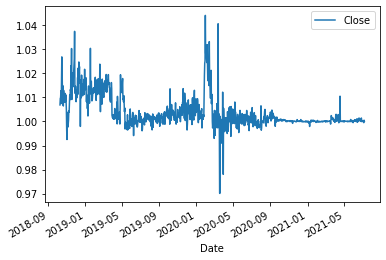

In [31]:
df_ts.plot()

In [32]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [33]:
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -3.956688
p-value                          0.001655
#lags Used                      16.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64


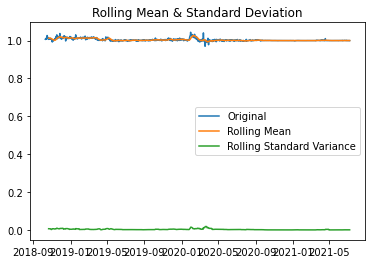

In [34]:
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

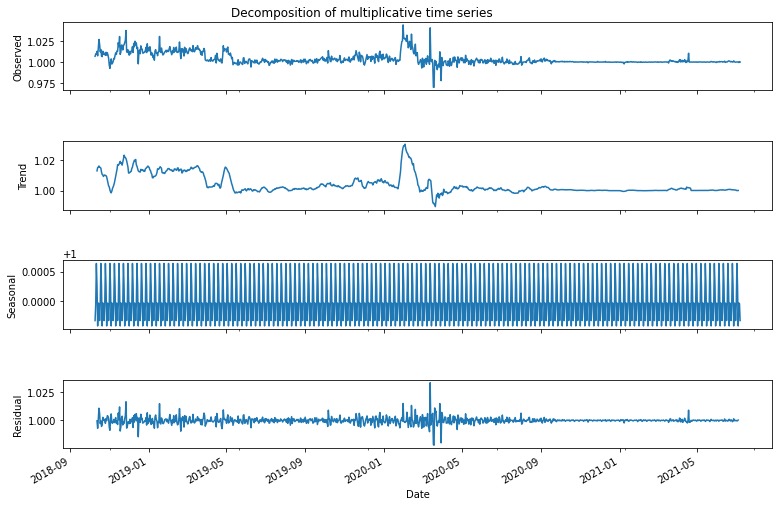

In [35]:
decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [36]:
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
2018-10-31  1.010548
2018-11-30  1.012591
2018-12-31  1.014527


In [37]:
tsm = df_ts_m['Close']
print (type(tsm))

<class 'pandas.core.series.Series'>


In [38]:
test_stationarity(tsm)


Results of Dickey-Fuller Test:
Test Statistic                 -2.197163
p-value                         0.207277
#lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


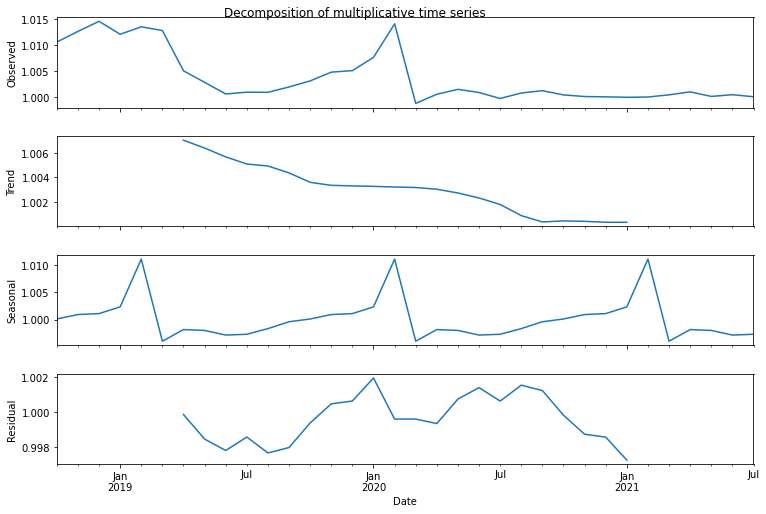

In [39]:
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [40]:
tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Stationarity Check
test_stationarity(tsmlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                -6.970741e+00
p-value                        8.678145e-10
#lags Used                     0.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (1%)           -3.653520e+00
Critical Value (5%)           -2.957219e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


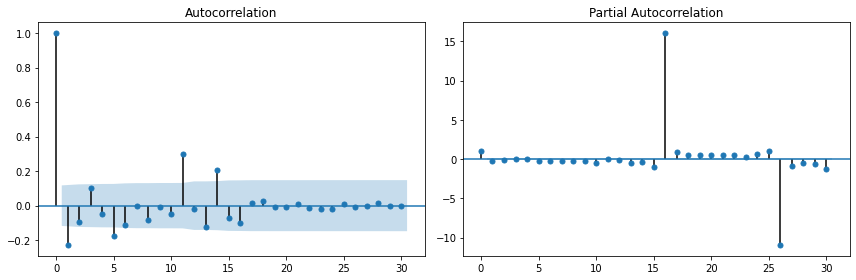

In [41]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [42]:
# Matic Data

In [43]:
df = pd.read_csv('/content/Matic Historical Data.csv', parse_dates=['Date'])
df.head(3)

,Date,Open,High,Low,Close,Volume
0,2019-06-27,0.018,0.022,0.017,0.019,1564289792
1,2019-06-28,0.019,0.021,0.019,0.019,929598144
2,2019-06-29,0.019,0.027,0.019,0.024,1788176128


In [44]:
print (df.describe())
print ("=============================================================")
print (df.dtypes)

             Open        High         Low       Close        Volume
count  951.000000  951.000000  951.000000  951.000000  9.510000e+02
mean     0.488713    0.519853    0.458566    0.490408  3.966684e+08
std      0.729288    0.773013    0.684819    0.730136  3.856922e+08
min      0.008000    0.009000    0.007000    0.008000  5.143041e+07
25%      0.016000    0.017000    0.015000    0.016000  1.687640e+08
50%      0.021000    0.023000    0.021000    0.022000  2.805389e+08
75%      1.051500    1.105000    1.015000    1.052500  4.747530e+08
max      2.874000    2.922000    2.712000    2.874000  6.204860e+09
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


In [45]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,2019-06-27,0.019
1,2019-06-28,0.019
2,2019-06-29,0.024


In [46]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
            Close
Date             
2019-06-27  0.019
2019-06-28  0.019
2019-06-29  0.024
            Close
Date             
2022-01-30  1.605
2022-01-31  1.642
2022-02-01  1.674


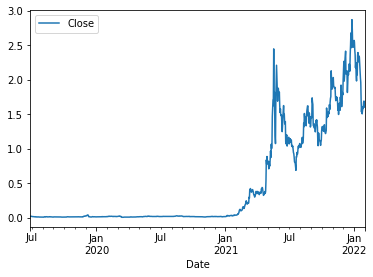

In [47]:
df_ts.plot()

In [48]:
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.534882
p-value                          0.516191
#lags Used                      21.000000
Number of Observations Used    929.000000
Critical Value (1%)             -3.437409
Critical Value (5%)             -2.864656
Critical Value (10%)            -2.568429
dtype: float64


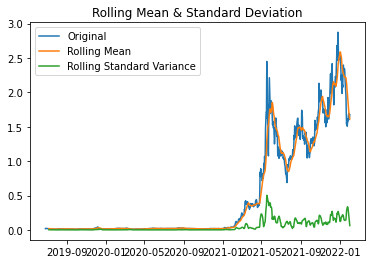

In [49]:
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

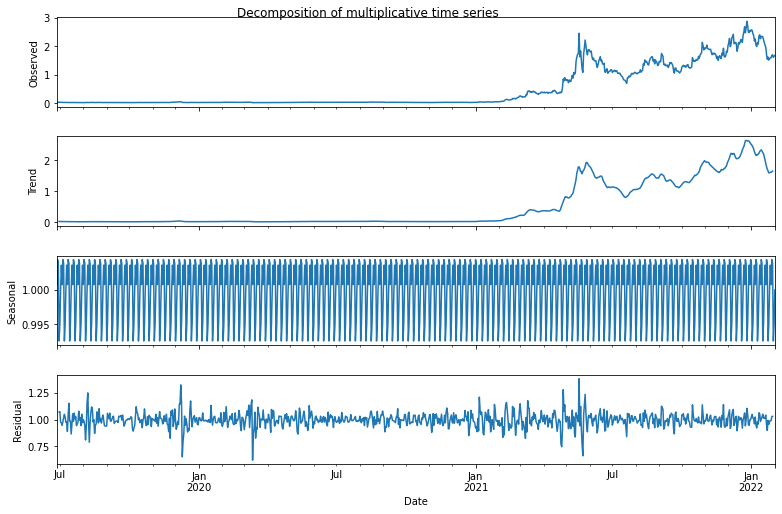

In [50]:
decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [51]:
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

<class 'pandas.core.frame.DataFrame'>
              Close
Date               
2019-06-30  0.02100
2019-07-31  0.01471
2019-08-31  0.01400


In [52]:
tsm = df_ts_m['Close']
print (type(tsm))

<class 'pandas.core.series.Series'>


In [53]:
test_stationarity(tsm)


Results of Dickey-Fuller Test:
Test Statistic                 -0.299418
p-value                         0.925587
#lags Used                      0.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


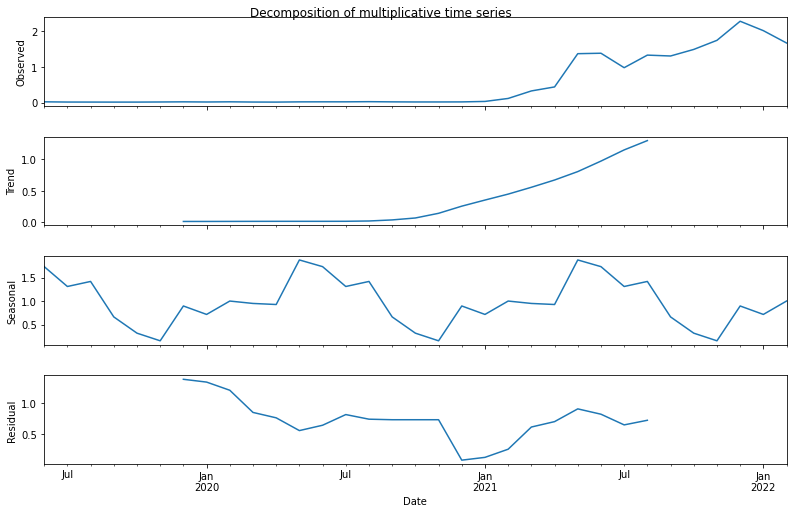

In [54]:
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [55]:

tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Stationarity Check
test_stationarity(tsmlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                 -2.731039
p-value                         0.068819
#lags Used                      3.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


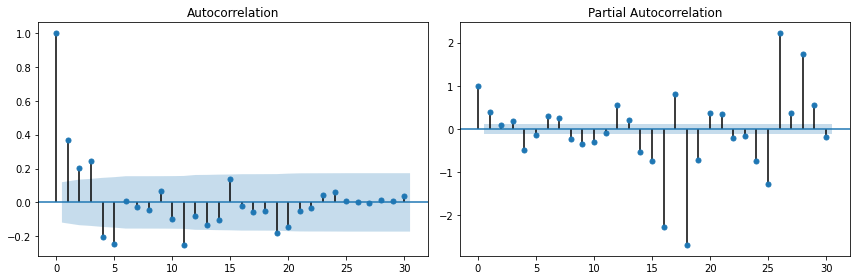

In [56]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()